# フーリエ変換で画像を計算する

## ユースケース：特定部位のエッジ検出する
* 周波数の特徴が画像で可視化される事でどの成分が多いいのか把握できる
* 特定部位にマスクを適応する事が容易になる
* 上記によって、エッジを検出する事が容易になる。

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

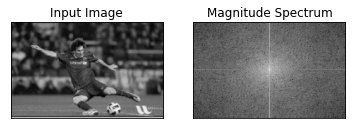

In [53]:
img = cv2.imread('messi5.jpg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

画像を右の画像の様な周波数領域画像に変換し、どのような成分をもつか確認

中心に白い領域が集中しているため底周波数領域が多いい画像

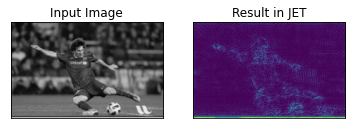

In [54]:
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
# plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
# plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()

### フーリエ変換　処理ステップ

1. 周波数領域画に対して、ハイパスフィルターを適応

2. 底周波数成分を減退させ、高周波数成分は残すし、マスク処理を行い底周波数成分を除去

3. 画像を再構成するために、逆フーリエ変換

4. 利点はエッジが比較的綺麗に検出できる事

---

# Cannyエッジ検出


In [30]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def canny(img, x, y):
    
    img_1 = cv2.imread(img,0)
# img_2 = cv2.imread("messi5.jpg",0)
    edges_1 = cv2.Canny(img_1, x , y)
# edges_2 = cv2.Canny(img, 150, 200)
    plt.subplot(121),plt.imshow(img_1, cmap = 'gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(edges_1)
    plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
    plt.show()

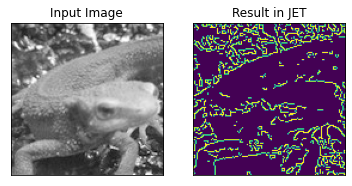

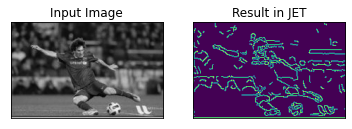

In [81]:
canny("./imori.jpg", 150, 200)
canny("messi5.jpg", 150, 200)

canny法は弱いエッジにも正確に検出できる。

従って、検出対象物のみが映る画像等のエッジ検出に向いている

---

### canny法の処理ステップ
1. ガウシアンフィルターによる平滑化
>エッジ検出はノイズに敏感な特性があるため、ガウシアンフィルターでノイズを削減
2. 画像の輝度勾配を検出
>輝度の計算
3. 非極大値の抑制
>輝度勾配を計算し極大値かを判断、それ以外は抑制され0。従って出力はたくさんのエッジがある2値画像
4. ヒステリシス特性で閾値処理
>3で検出されたエッジに対して正しいエッジを採用し、そうでないエッジを削除
#### memo

* ヒステリシス特性：加える値が最初の状態の時と同じに戻しても、状態が完全に戻らない事
* 輝度計算式：0.299×R ＋ 0.587×G ＋ 0.114×B （≒ 0.3R＋0.6G＋0.1B）
* エッジ：輝度の不連続性⇨